# 2025-08-25 Functions

* Review last time

* Julia intro

* Julia plotting

* Floating point numbers

* Relative & absolute errors

## Julia

* Fairly new (2012)

* Can be complied or interperted

* Easy to pick up if you know Matlab or Python

* [https://julialang.org/learning](https://julialang.org/learning)

* CSCI provides JupyterHub at [https://coding.csel.io](https://coding.csel.io)

In [1]:
# Note which one gets printed out
x = 13
y = 42

42

In [2]:
# Semicolons supress output printing
x = 9;

In [3]:
# Can also do formatted printing
println("$x + $y = $(x + y)")

9 + 42 = 51


In [4]:
# Also have the ability to print the operation and result
# Note the annoying side effect here of the parsing rules
@show x + y

x + y = 51


51

In [5]:
# And math can be written *as* math
@show area = π * x^2;

area = π * x ^ 2 = 254.46900494077323


## Numbers

In [6]:
# What are all of these types?
typeof(42), typeof(big(42)), typeof(42.0f0), typeof(42.0), typeof(big(42.0))

(Int64, BigInt, Float32, Float64, BigFloat)

In [7]:
# What are the promotion rules?
@show 13 + 42.0
@show 13.0f0 + 42.0
@show 13 + 42.0f0;

13 + 42.0 = 55.0
13.0f0 + 42.0 = 55.0
13 + 42.0f0 = 55.0f0


In [8]:
# Watch out for division rules
@show 42 / 13
@show 42 ÷ 13;

42 / 13 = 3.230769230769231
42 ÷ 13 = 3


In [9]:
# And how integer division works
@show -42 / 13
@show -42 ÷ 13;

-42 / 13 = -3.230769230769231
-42 ÷ 13 = -3


## Arrays

In [10]:
# Note that changing the type in assigment is ok
x = [1, 2, 3]

3-element Vector{Int64}:
 1
 2
 3

In [11]:
# But I want floats?
x = Float64[4, 5, 6]

3-element Vector{Float64}:
 4.0
 5.0
 6.0

In [12]:
# Note promotion rules still work
[1, 2, 3.] + [4, 5, 6]

3-element Vector{Float64}:
 5.0
 7.0
 9.0

In [13]:
# 1 based indexing scheme (😭)
@show x[2] = 13
typeof(x[2])

x[2] = 13 = 13


Float64

In [14]:
# And matrixes are 2D arrays
A = [1. 2 3; 4 5 6; 7 8 9]

3×3 Matrix{Float64}:
 1.0  2.0  3.0
 4.0  5.0  6.0
 7.0  8.0  9.0

## Functions

In [15]:
# Basic syntax
function f(x, y; z = 3)
    return (x + y) * z
end

f (generic function with 1 method)

In [16]:
# z is an optional parameter with a default value
@show y1 = f(1, 2)
@show y2 = f(1, 2; z = 4);

y1 = f(1, 2) = 9
y2 = f(1, 2; z = 4) = 12


In [17]:
# But what is returned here?
function f(x, y; z = 3)
    (x + y) * z
end

f (generic function with 1 method)

In [18]:
# Last statement executed in functino return value
@show y1 = f(1, 2)
@show y2 = f(1, 2; z = 4);

y1 = f(1, 2) = 9
y2 = f(1, 2; z = 4) = 12


In [19]:
# Function 'assignment form'
f(x, y; z = 3) = (x + y) * z

f (generic function with 1 method)

In [20]:
# It works the same way - that's comforting
@show y1 = f(1, 2)
@show y2 = f(1, 2; z = 4);

y1 = f(1, 2) = 9
y2 = f(1, 2; z = 4) = 12


In [21]:
# Anonymous functions
((x, y; z = 3) -> (x + y) * z)(1, 2; z = 8)

24

In [22]:
# This is useful in the same way as in Python or JS
map(x -> x^2, [2, 3, 4])

3-element Vector{Int64}:
  4
  9
 16

In [23]:
[1, 2, 3] .* [4, 5, 6]

3-element Vector{Int64}:
  4
 10
 18

## Loops

In [24]:
# Ranges like in Python or Rust
1:13

1:13

In [25]:
# Can create arrays this way
collect(1:13.)

13-element Vector{Float64}:
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0
 11.0
 12.0
 13.0

In [26]:
# And for loops use ranges
iterations = 420000
hits = 0
for i in 1:iterations
    hits += √(rand()^2 + rand()^2) ≤ 1
end
estimate = 4 * hits / iterations
@show π - estimate;

π - estimate = -0.00033115593401644716


In [27]:
# List comprehension also works
estimate = sum([1/n^2 for n in 1:13000])
@show π^2 / 6 - estimate;

π ^ 2 / 6 - estimate = 7.692011841831103e-5


## Plotting

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


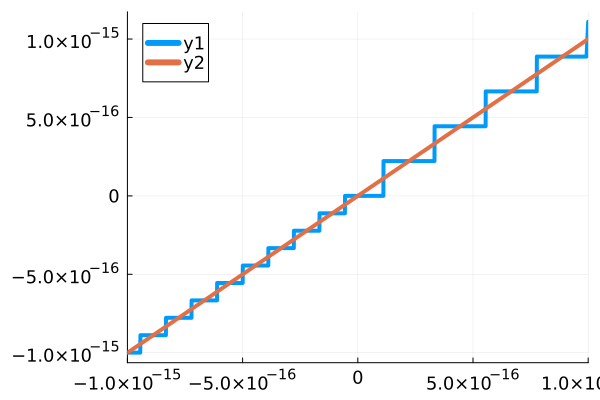

In [28]:
# Need to add package first
using Pkg
pkg"add Plots"
using Plots
default(lw=4, ms=5, legendfontsize=12, xtickfontsize=12, ytickfontsize=12)

a = 1e-15
plot(x -> (1 + x) - 1, xlim=(-a, a))
plot!(x -> x)

## Machine precision

Floating point numbers do not exactly represent continuous values.

There exists $\epsilon_\text{machine}$ such that

$$ 1 \oplus x = 1 $$ for all $$ \lvert x \rvert < \epsilon_\text{machine} $$

Note: $\oplus, \ominus, \otimes, \oslash$ are the floating point arithmatic versions of $+, -, \times, /$

In [29]:
# Computing machine precision
ϵ = 1
while 1 + ϵ != 1
    ϵ = ϵ / 2
end

# And lets ask Julia what ϵ actually is
@show ϵ
@show eps();

ϵ = 1.1102230246251565e-16
eps() = 2.220446049250313e-16


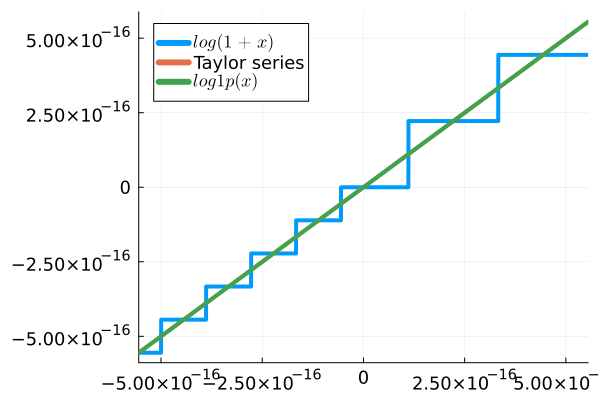

In [30]:
# But why do we care?
f1(x) = log(1 + x)
f2(x) = x - x^2 / 2 + x^3 / 3 # Taylor series
f3(x) = log1p(x)

plot([f1, f2, f3], xlims=[-5 * ϵ, 5 * ϵ], label=["\$log(1+x)\$" "Taylor series" "\$log1p(x)\$"])

In [31]:
# How to measure the error?
y1 = f1(1e-8)
y2 = f2(1e-8)

# Absolute
println("absolute error: $(y1 - y2)")

# Relative
println("relative error: $((y1 - y2) / y2)")

absolute error: -6.07747099184471e-17
relative error: -6.077471022232065e-9
